# Credit Card Fraud Detection: Imbalanced Dataset

📌 **Imbalanced dataset** is seen in classification problems and occurs when the class distributions are not close to each other. The problem is that the majority class dominates the minority class. The model created is close to the majority class, which causes poor classification of the minority class.

📌 When we encounter imbalanced data sets, there are various methods we can apply to make accurate observations and maintain balance:

* Choosing the Suitable Metrics
  * Precision
  * Recall
  * F1-score
  * ROC Curve
  * AUC
* Resampling
  * oversampling
    * Random Oversampling
    * SMOTE Oversampling
  * undersampling
    * Random Undersampling
    * NearMiss Undersampling
    * Undersampling (Tomek links)
    * Undersampling (Cluster Centroids)
* collect more data
* Creating a model that can learn equally from minority and majority classes by using the "class_weight" parameter in classification models
* Looking at the performances of other models, not just one model
* Applying a different approach and performing Anomaly detection or Change detection

# Dataset Story

📌 The data set consists of transactions made with credit cards in Europe in September 2013 and labeling these transactions as 0 if not 1 if they are fraudulent. For privacy reasons, there is not much background information and other variables, except for the "Time","Amount" variable, have been converted with PCA(Principal component analysis).

* Time: the second between the first operation and each operation

* Amount: cost

Click this <a href="https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud">link</a> to download the dataset.

# Import Necessary Libraries

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from matplotlib import rc,rcParams
import itertools

pd.set_option("display.max_columns",None)
pd.set_option("display.width",500)
pd.set_option("display.float_format", lambda x: "%.4f" % x)

from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report,f1_score,recall_score,roc_auc_score, roc_curve, accuracy_score

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import ClusterCentroids

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

# Import Dataset

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0000,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,0.0908,-0.5516,-0.6178,-0.9914,-0.3112,1.4682,-0.4704,0.2080,0.0258,0.4040,0.2514,-0.0183,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,149.6200,0
1,0.0000,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,-0.1670,1.6127,1.0652,0.4891,-0.1438,0.6356,0.4639,-0.1148,-0.1834,-0.1458,-0.0691,-0.2258,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,2.6900,0
2,1.0000,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,-1.5147,0.2076,0.6245,0.0661,0.7173,-0.1659,2.3459,-2.8901,1.1100,-0.1214,-2.2619,0.5250,0.2480,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598,378.6600,0
3,1.0000,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,-1.3870,-0.0550,-0.2265,0.1782,0.5078,-0.2879,-0.6314,-1.0596,-0.6841,1.9658,-1.2326,-0.2080,-0.1083,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615,123.5000,0
4,2.0000,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,0.8177,0.7531,-0.8228,0.5382,1.3459,-1.1197,0.1751,-0.4514,-0.2370,-0.0382,0.8035,0.4085,-0.0094,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152,69.9900,0


# General Information About to the Dataset

In [4]:
def check_df(dataframe,head=5):
  print("######################### Head #########################")
  print(dataframe.head(head))
  print("######################### Tail #########################")
  print(dataframe.tail(head))
  print("######################### Shape #########################")
  print(dataframe.shape)
  print("######################### Types #########################")
  print(dataframe.dtypes)
  print("######################### NA #########################")
  print(dataframe.isnull().sum())
  print("######################### Qurtiles #########################")
  print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [5]:
check_df(df)

######################### Head #########################
    Time      V1      V2     V3      V4      V5      V6      V7      V8      V9     V10     V11     V12     V13     V14     V15     V16     V17     V18     V19     V20     V21     V22     V23     V24     V25     V26     V27     V28   Amount  Class
0 0.0000 -1.3598 -0.0728 2.5363  1.3782 -0.3383  0.4624  0.2396  0.0987  0.3638  0.0908 -0.5516 -0.6178 -0.9914 -0.3112  1.4682 -0.4704  0.2080  0.0258  0.4040  0.2514 -0.0183  0.2778 -0.1105  0.0669  0.1285 -0.1891  0.1336 -0.0211 149.6200      0
1 0.0000  1.1919  0.2662 0.1665  0.4482  0.0600 -0.0824 -0.0788  0.0851 -0.2554 -0.1670  1.6127  1.0652  0.4891 -0.1438  0.6356  0.4639 -0.1148 -0.1834 -0.1458 -0.0691 -0.2258 -0.6387  0.1013 -0.3398  0.1672  0.1259 -0.0090  0.0147   2.6900      0
2 1.0000 -1.3584 -1.3402 1.7732  0.3798 -0.5032  1.8005  0.7915  0.2477 -1.5147  0.2076  0.6245  0.0661  0.7173 -0.1659  2.3459 -2.8901  1.1100 -0.1214 -2.2619  0.5250  0.2480  0.7717  0.9094 -0.6893

# Analysis of Categorical and Numerical Variables

In [6]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
  #Catgeorical Variable Selection
  cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category","object","bool"]]
  num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes in ["uint8","int64","float64"]]
  cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and str(dataframe[col].dtypes) in ["category","object"]]
  cat_cols = cat_cols + num_but_cat
  cat_cols = [col for col in cat_cols if col not in cat_but_car]

  #Numerical Variable Selection
  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["uint8","int64","float64"]]
  num_cols = [col for col in num_cols if col not in cat_cols]

  return cat_cols, num_cols, cat_but_car

In [7]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

#Print Categorical and Numerical Variables
print(f"Observations: {df.shape[0]}")
print(f"Variables: {df.shape[1]}")
print(f"Cat_cols: {len(cat_cols)}")
print(f"Num_cols: {len(num_cols)}")
print(f"Cat_but_car: {len(cat_but_car)}")

Observations: 284807
Variables: 31
Cat_cols: 1
Num_cols: 30
Cat_but_car: 0


In [8]:
def cat_summary(dataframe,col_name,plot=False):
  print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                      'Ration': 100 * dataframe[col_name].value_counts() / len(dataframe)}))
  print("##########################################")
  if plot:
    sns.countplot(x=dataframe[col_name],data=dataframe)
    plt.show(block=True)

In [9]:
def cat_summary_df(dataframe):
  cat_cols, num_cols, cat_but_car = grab_col_names(df)
  for col in cat_cols:
    cat_summary(dataframe, col, plot=True)

    Class  Ration
0  284315 99.8273
1     492  0.1727
##########################################


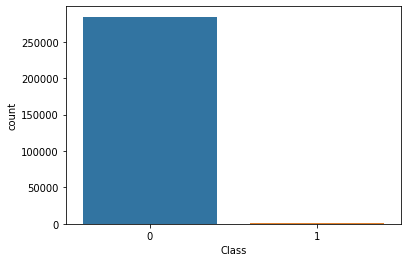

In [11]:
cat_summary_df(df)

In [12]:
def num_summary(dataframe, num_col, plot=False):
  quantiles = [0.01, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
  print(dataframe[num_col].describe(quantiles).T)

  if plot:
    dataframe[num_col].hist(bins=20)
    plt.xlabel(num_col)
    plt.title(num_col)
    plt.show(block=True)

In [13]:
def num_summary_df(dataframe):
  cat_cols, num_cols, cat_but_car = grab_col_names(df)
  for col in num_cols:
    num_summary(dataframe, col, plot=True)

count   284807.0000
mean     94813.8596
std      47488.1460
min          0.0000
1%        2422.0000
5%       25297.6000
10%      35027.0000
20%      47694.2000
30%      60776.0000
40%      73261.4000
50%      84692.0000
60%     120396.0000
70%     132929.0000
80%     145247.8000
90%     157640.4000
95%     164143.4000
99%     170560.9400
max     172792.0000
Name: Time, dtype: float64


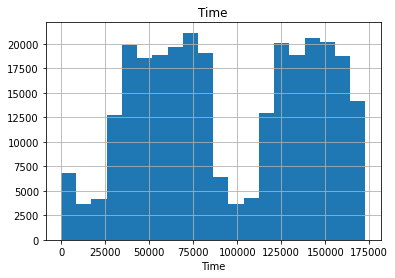

count   284807.0000
mean         0.0000
std          1.9587
min        -56.4075
1%          -6.5632
5%          -2.8991
10%         -1.8933
20%         -1.1347
30%         -0.7473
40%         -0.4268
50%          0.0181
60%          1.0351
70%          1.2248
80%          1.6949
90%          2.0154
95%          2.0812
99%          2.2371
max          2.4549
Name: V1, dtype: float64


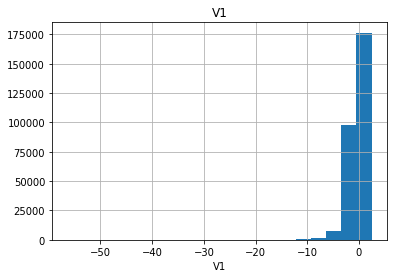

count   284807.0000
mean         0.0000
std          1.6513
min        -72.7157
1%          -4.9603
5%          -1.9720
10%         -1.3599
20%         -0.7908
30%         -0.4364
40%         -0.1538
50%          0.0655
60%          0.3027
70%          0.6368
80%          0.9573
90%          1.3266
95%          1.8086
99%          3.8018
max         22.0577
Name: V2, dtype: float64


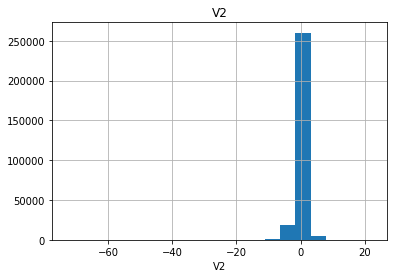

count   284807.0000
mean        -0.0000
std          1.5163
min        -48.3256
1%          -3.9784
5%          -2.3897
10%         -1.8026
20%         -1.1690
30%         -0.6168
40%         -0.1991
50%          0.1798
60%          0.4970
70%          0.8435
80%          1.2157
90%          1.6762
95%          2.0626
99%          2.7284
max          9.3826
Name: V3, dtype: float64


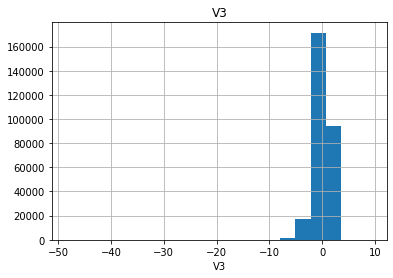

count   284807.0000
mean         0.0000
std          1.4159
min         -5.6832
1%          -3.1230
5%          -2.1957
10%         -1.6563
20%         -1.0661
30%         -0.6962
40%         -0.3942
50%         -0.0198
60%          0.2849
70%          0.5589
80%          0.9862
90%          1.4828
95%          2.5665
99%          4.2480
max         16.8753
Name: V4, dtype: float64


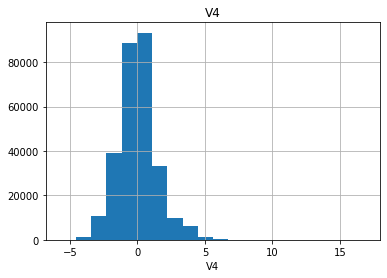

count   284807.0000
mean         0.0000
std          1.3802
min       -113.7433
1%          -3.0604
5%          -1.7020
10%         -1.3022
20%         -0.8596
30%         -0.5445
40%         -0.2901
50%         -0.0543
60%          0.1866
70%          0.4570
80%          0.8022
90%          1.4079
95%          2.0990
99%          3.4249
max         34.8017
Name: V5, dtype: float64


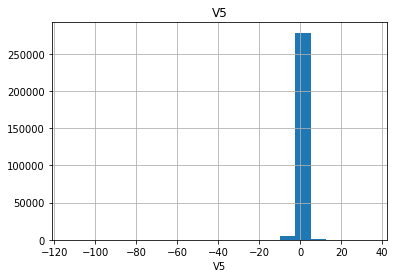

count   284807.0000
mean         0.0000
std          1.3323
min        -26.1605
1%          -2.1240
5%          -1.4068
10%         -1.1675
20%         -0.8782
30%         -0.6678
40%         -0.4795
50%         -0.2742
60%         -0.0482
70%          0.2232
80%          0.6290
90%          1.5094
95%          3.1604
99%          4.2001
max         73.3016
Name: V6, dtype: float64


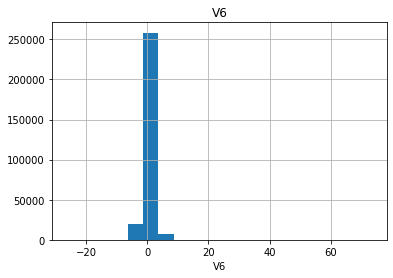

count   284807.0000
mean        -0.0000
std          1.2371
min        -43.5572
1%          -3.0128
5%          -1.4344
10%         -1.0781
20%         -0.6833
30%         -0.4260
40%         -0.1593
50%          0.0401
60%          0.2135
70%          0.4462
80%          0.6983
90%          1.0394
95%          1.4076
99%          2.6962
max        120.5895
Name: V7, dtype: float64


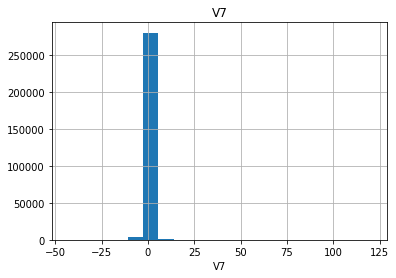

count   284807.0000
mean         0.0000
std          1.1944
min        -73.2167
1%          -4.0339
5%          -0.8421
10%         -0.4589
20%         -0.2663
30%         -0.1582
40%         -0.0661
50%          0.0224
60%          0.1205
70%          0.2434
80%          0.4355
90%          0.7694
95%          1.0500
99%          2.0760
max         20.0072
Name: V8, dtype: float64


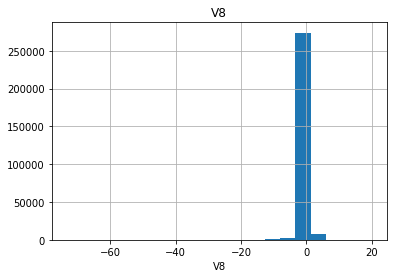

count   284807.0000
mean        -0.0000
std          1.0986
min        -13.4341
1%          -2.4553
5%          -1.7584
10%         -1.2940
20%         -0.8089
30%         -0.5022
40%         -0.2577
50%         -0.0514
60%          0.1762
70%          0.4459
80%          0.7916
90%          1.3017
95%          1.7808
99%          2.9868
max         15.5950
Name: V9, dtype: float64


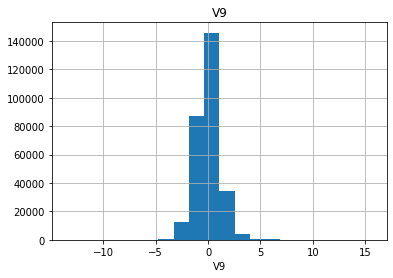

count   284807.0000
mean         0.0000
std          1.0888
min        -24.5883
1%          -2.0927
5%          -1.3386
10%         -1.0322
20%         -0.6665
30%         -0.4258
40%         -0.2482
50%         -0.0929
60%          0.0595
70%          0.2695
80%          0.6482
90%          1.1198
95%          1.5486
99%          3.2536
max         23.7451
Name: V10, dtype: float64


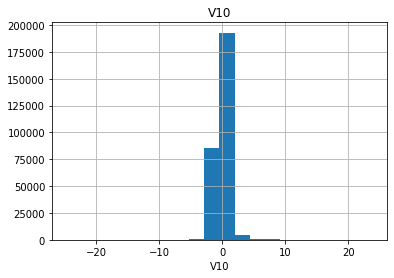

count   284807.0000
mean         0.0000
std          1.0207
min         -4.7975
1%          -2.0931
5%          -1.5719
10%         -1.2890
20%         -0.9170
30%         -0.6130
40%         -0.3171
50%         -0.0328
60%          0.2679
70%          0.5786
80%          0.9132
90%          1.3186
95%          1.6140
99%          2.2906
max         12.0189
Name: V11, dtype: float64


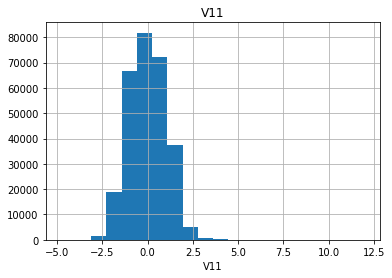

count   284807.0000
mean        -0.0000
std          0.9992
min        -18.6837
1%          -3.0639
5%          -1.9672
10%         -1.1480
20%         -0.5731
30%         -0.2720
40%         -0.0505
50%          0.1400
60%          0.3248
70%          0.5165
80%          0.7307
90%          1.0173
95%          1.2431
99%          1.6986
max          7.8484
Name: V12, dtype: float64


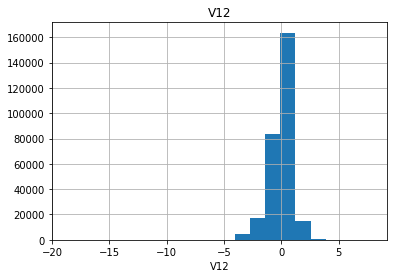

count   284807.0000
mean         0.0000
std          0.9953
min         -5.7919
1%          -2.2831
5%          -1.6397
10%         -1.2800
20%         -0.8247
30%         -0.4972
40%         -0.2396
50%         -0.0136
60%          0.2287
70%          0.5050
80%          0.8291
90%          1.2518
95%          1.6079
99%          2.5140
max          7.1269
Name: V13, dtype: float64


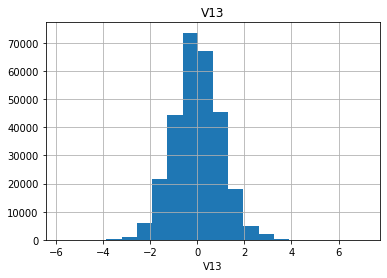

count   284807.0000
mean         0.0000
std          0.9586
min        -19.2143
1%          -2.7998
5%          -1.4394
10%         -1.0037
20%         -0.5673
30%         -0.3125
40%         -0.1197
50%          0.0506
60%          0.2163
70%          0.3939
80%          0.6087
90%          0.9814
95%          1.3937
99%          2.1503
max         10.5268
Name: V14, dtype: float64


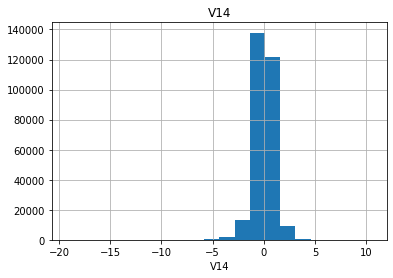

count   284807.0000
mean         0.0000
std          0.9153
min         -4.4989
1%          -2.3839
5%          -1.5932
10%         -1.1739
20%         -0.7487
30%         -0.4386
40%         -0.1888
50%          0.0481
60%          0.2720
70%          0.5137
80%          0.7951
90%          1.1242
95%          1.3731
99%          1.9255
max          8.8777
Name: V15, dtype: float64


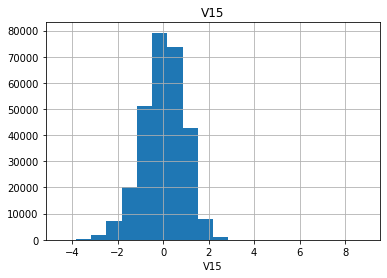

count   284807.0000
mean         0.0000
std          0.8763
min        -14.1299
1%          -2.3818
5%          -1.4917
10%         -1.0594
20%         -0.6165
30%         -0.3430
40%         -0.1252
50%          0.0664
60%          0.2415
70%          0.4265
80%          0.6414
90%          0.9909
95%          1.3253
99%          1.8748
max         17.3151
Name: V16, dtype: float64


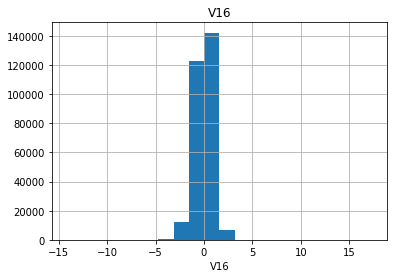

count   284807.0000
mean        -0.0000
std          0.8493
min        -25.1628
1%          -1.3500
5%          -0.9830
10%         -0.8043
20%         -0.5758
30%         -0.3969
40%         -0.2356
50%         -0.0657
60%          0.1049
70%          0.2968
80%          0.5189
90%          0.9086
95%          1.2746
99%          2.2899
max          9.2535
Name: V17, dtype: float64


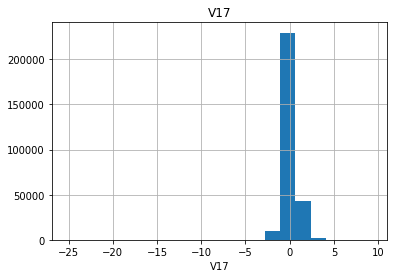

count   284807.0000
mean         0.0000
std          0.8382
min         -9.4987
1%          -2.1471
5%          -1.3581
10%         -0.9769
20%         -0.6267
30%         -0.3857
40%         -0.1856
50%         -0.0036
60%          0.1821
70%          0.3831
80%          0.6375
90%          1.0205
95%          1.3944
99%          2.0687
max          5.0411
Name: V18, dtype: float64


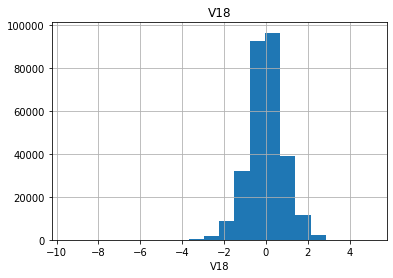

count   284807.0000
mean         0.0000
std          0.8140
min         -7.2135
1%          -2.0755
5%          -1.3563
10%         -0.9856
20%         -0.5828
30%         -0.3451
40%         -0.1620
50%          0.0037
60%          0.1679
70%          0.3482
80%          0.5857
90%          0.9538
95%          1.2862
99%          2.2629
max          5.5920
Name: V19, dtype: float64


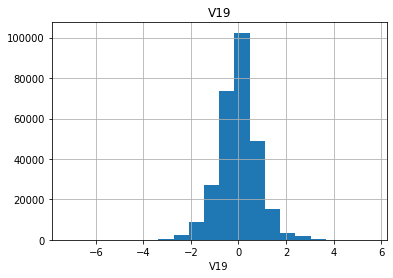

count   284807.0000
mean         0.0000
std          0.7709
min        -54.4977
1%          -1.5684
5%          -0.5584
10%         -0.3896
20%         -0.2512
30%         -0.1787
40%         -0.1208
50%         -0.0625
60%          0.0043
70%          0.0834
80%          0.1958
90%          0.4446
95%          0.8361
99%          2.4122
max         39.4209
Name: V20, dtype: float64


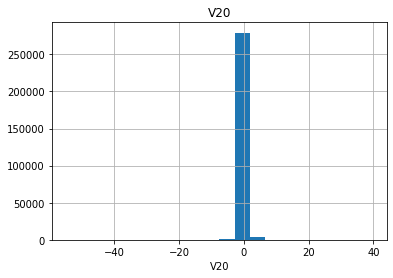

count   284807.0000
mean         0.0000
std          0.7345
min        -34.8304
1%          -1.4697
5%          -0.5047
10%         -0.3674
20%         -0.2664
30%         -0.1878
40%         -0.1064
50%         -0.0295
60%          0.0504
70%          0.1379
80%          0.2354
90%          0.3762
95%          0.5379
99%          1.9319
max         27.2028
Name: V21, dtype: float64


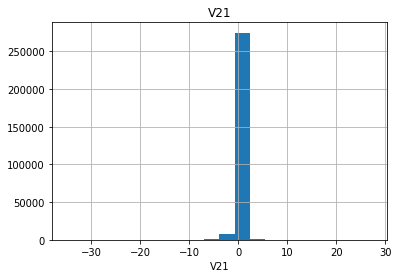

count   284807.0000
mean        -0.0000
std          0.7257
min        -10.9331
1%          -1.6546
5%          -1.0819
10%         -0.8675
20%         -0.6416
30%         -0.4344
40%         -0.2019
50%          0.0068
60%          0.2006
70%          0.4127
80%          0.6485
90%          0.9149
95%          1.1290
99%          1.5302
max         10.5031
Name: V22, dtype: float64


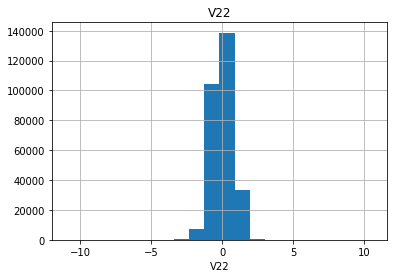

count   284807.0000
mean         0.0000
std          0.6245
min        -44.8077
1%          -1.1934
5%          -0.4722
10%         -0.3286
20%         -0.2037
30%         -0.1262
40%         -0.0651
50%         -0.0112
60%          0.0448
70%          0.1093
80%          0.1943
90%          0.3393
95%          0.4880
99%          1.5087
max         22.5284
Name: V23, dtype: float64


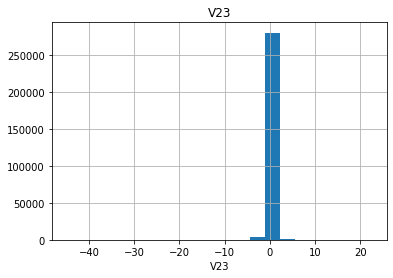

count   284807.0000
mean         0.0000
std          0.6056
min         -2.8366
1%          -1.6573
5%          -1.1437
10%         -0.8704
20%         -0.4443
30%         -0.2635
40%         -0.0458
50%          0.0410
60%          0.1664
70%          0.3742
80%          0.5323
90%          0.7054
95%          0.8664
99%          1.0637
max          4.5845
Name: V24, dtype: float64


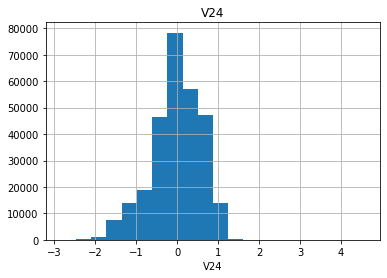

count   284807.0000
mean         0.0000
std          0.5213
min        -10.2954
1%          -1.4209
5%          -0.8250
10%         -0.6061
20%         -0.3917
30%         -0.2584
40%         -0.1289
50%          0.0166
60%          0.1586
70%          0.2849
80%          0.4175
90%          0.6009
95%          0.7607
99%          1.2040
max          7.5196
Name: V25, dtype: float64


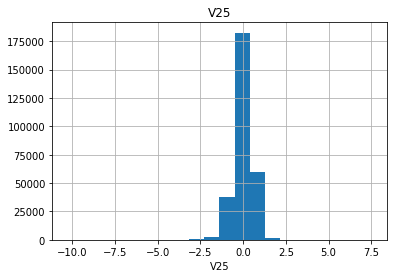

count   284807.0000
mean         0.0000
std          0.4822
min         -2.6046
1%          -1.0094
5%          -0.6973
10%         -0.5480
20%         -0.3895
30%         -0.2744
40%         -0.1663
50%         -0.0521
60%          0.0861
70%          0.1751
80%          0.3603
90%          0.6889
95%          0.9209
99%          1.1587
max          3.5173
Name: V26, dtype: float64


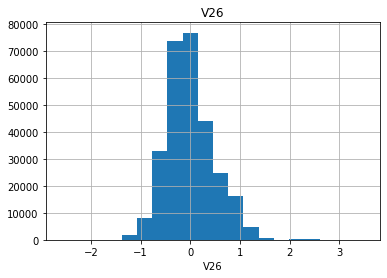

count   284807.0000
mean        -0.0000
std          0.4036
min        -22.5657
1%          -1.2477
5%          -0.4152
10%         -0.2115
20%         -0.0911
30%         -0.0542
40%         -0.0244
50%          0.0013
60%          0.0292
70%          0.0632
80%          0.1353
90%          0.2654
95%          0.3877
99%          0.9314
max         31.6122
Name: V27, dtype: float64


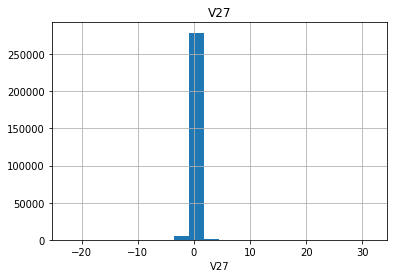

count   284807.0000
mean        -0.0000
std          0.3301
min        -15.4301
1%          -0.8763
5%          -0.3178
10%         -0.1556
20%         -0.0654
30%         -0.0403
40%         -0.0120
50%          0.0112
60%          0.0269
70%          0.0535
80%          0.1014
90%          0.1799
95%          0.2561
99%          0.5411
max         33.8478
Name: V28, dtype: float64


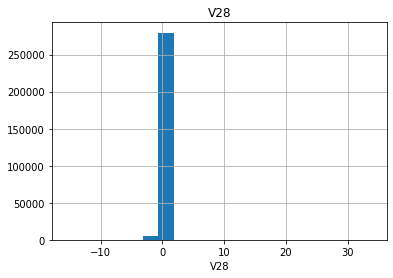

count   284807.0000
mean        88.3496
std        250.1201
min          0.0000
1%           0.1200
5%           0.9200
10%          1.0000
20%          3.5700
30%          8.9100
40%         13.0000
50%         22.0000
60%         37.0000
70%         59.8000
80%        100.0000
90%        203.0000
95%        365.0000
99%       1017.9700
max      25691.1600
Name: Amount, dtype: float64


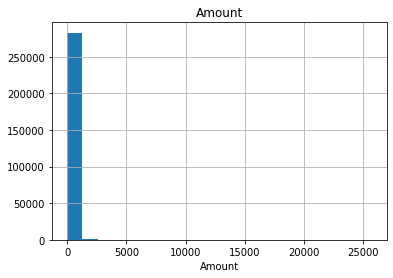

In [14]:
num_summary_df(df)

In [20]:
def plot_num_summary(dataframe):
  cat_cols, num_cols, cat_but_car = grab_col_names(dataframe)
  plt.figure(figsize=(24,24))
  for index, col in enumerate(num_cols):
    plt.subplot(6,5,index+1)
    plt.tight_layout()
    dataframe[col].hist(bins=20)
    plt.title(col)

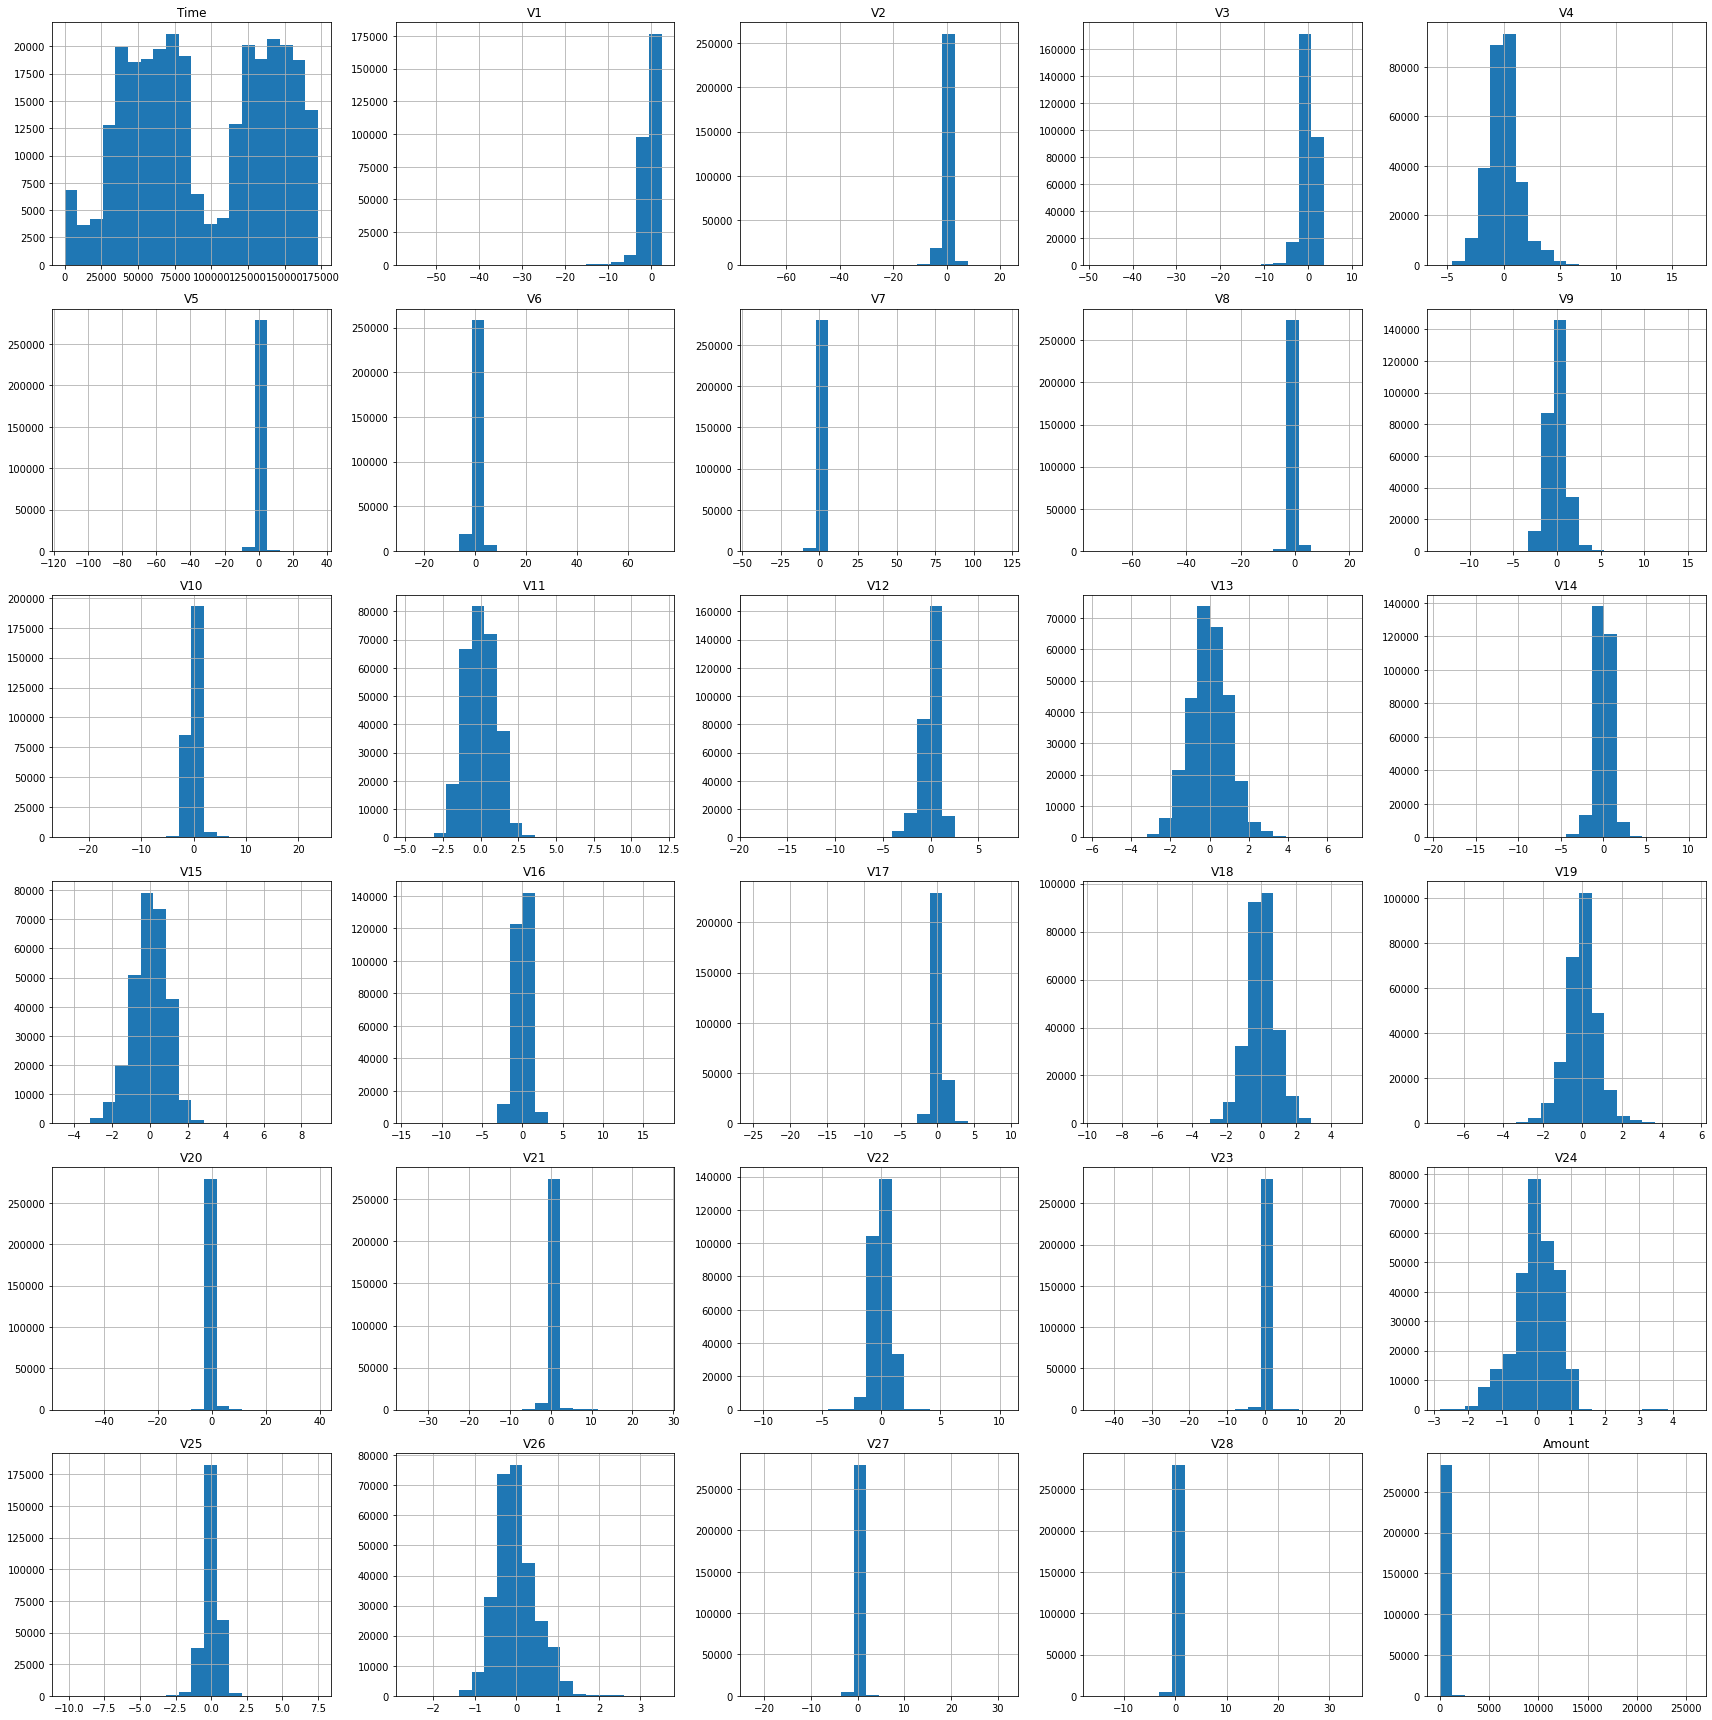

In [21]:
plot_num_summary(df)

In [22]:
def target_summary_with_num(dataframe, target, numerical_col):
  print(dataframe.groupby(target).agg({numerical_col: "mean"}))
  print("#############################################")

In [23]:
def target_summary_with_num_df(dataframe, target):
  cat_cols, num_cols, cat_but_car = grab_col_names(df)
  for col in num_cols:
    target_summary_with_num(dataframe, target, col)

In [24]:
target_summary_with_num_df(df, "Class")

            Time
Class           
0     94838.2023
1     80746.8069
#############################################
           V1
Class        
0      0.0083
1     -4.7719
#############################################
           V2
Class        
0     -0.0063
1      3.6238
#############################################
           V3
Class        
0      0.0122
1     -7.0333
#############################################
           V4
Class        
0     -0.0079
1      4.5420
#############################################
           V5
Class        
0      0.0055
1     -3.1512
#############################################
           V6
Class        
0      0.0024
1     -1.3977
#############################################
           V7
Class        
0      0.0096
1     -5.5687
#############################################
           V8
Class        
0     -0.0010
1      0.5706
#############################################
           V9
Class        
0      0.0045
1     -2.5811
##############

# Correlation Analysis

In [25]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.0000,0.1174,-0.0106,-0.4196,-0.1053,0.1731,-0.0630,0.0847,-0.0369,-0.0087,0.0306,-0.2477,0.1243,-0.0659,-0.0988,-0.1835,0.0119,-0.0733,0.0904,0.0290,-0.0509,0.0447,0.1441,0.0511,-0.0162,-0.2331,-0.0414,-0.0051,-0.0094,-0.0106,-0.0123
V1,0.1174,1.0000,0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000,-0.2277,-0.1013
V2,-0.0106,0.0000,1.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.5314,0.0913
V3,-0.4196,-0.0000,0.0000,1.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000,-0.2109,-0.1930
V4,-0.1053,-0.0000,-0.0000,0.0000,1.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0987,0.1334
V5,0.1731,0.0000,0.0000,-0.0000,-0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,-0.3864,-0.0950
V6,-0.0630,-0.0000,0.0000,0.0000,-0.0000,0.0000,1.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,0.2160,-0.0436
V7,0.0847,-0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.3973,-0.1873
V8,-0.0369,-0.0000,-0.0000,-0.0000,0.0000,0.0000,-0.0000,0.0000,1.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.1031,0.0199
V9,-0.0087,-0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,-0.0442,-0.0977


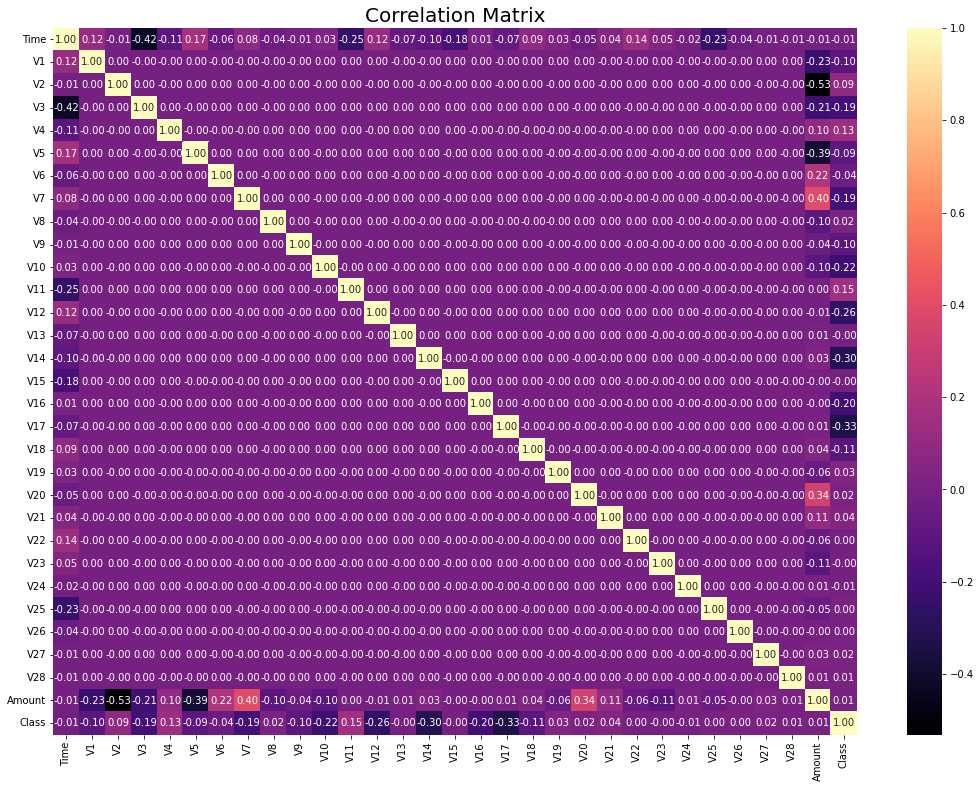

In [26]:
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [27]:
def high_correlated_cols(dataframe, plot=False, corr_th = 0.90):
  corr = dataframe.corr()
  corr_matrix = corr.abs()
  upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
  drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]

  if drop_list == []:
    print("############## After Correlation Analysis, You Don't Need to Remove Variables ##############")

  if plot:
    sns.set(rc = {'figure.figsize':(18,13)})
    sns.heatmap(corr, cmap="RdBu")
    plt.show()
  return drop_list

############## After Correlation Analysis, You Don't Need to Remove Variables ##############


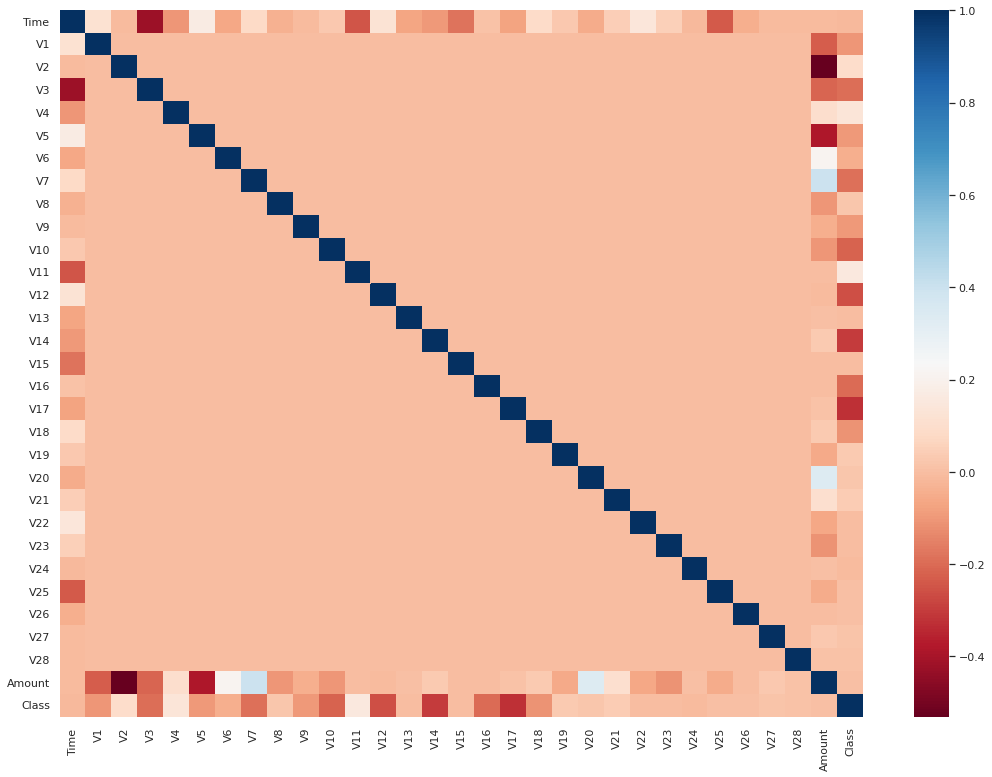

[]

In [28]:
high_correlated_cols(df, plot=True)

# Exploratory Data Analysis

In [33]:
def exploratory_data(dataframe):
  import warnings
  warnings.filterwarnings('ignore')
  cat_cols, num_cols, cat_but_car = grab_col_names(dataframe)
  fig,ax = plt.subplots(30,3,figsize=(30,90))
  for index, col in enumerate(num_cols):
    sns.distplot(dataframe[col],ax=ax[index,0])
    sns.boxplot(dataframe[col],ax=ax[index,1])
    stats.probplot(dataframe[col],plot=ax[index,2])
  fig.tight_layout()
  fig.subplots_adjust(top=0.95)
  plt.suptitle("Visualizing Continuous Columns")

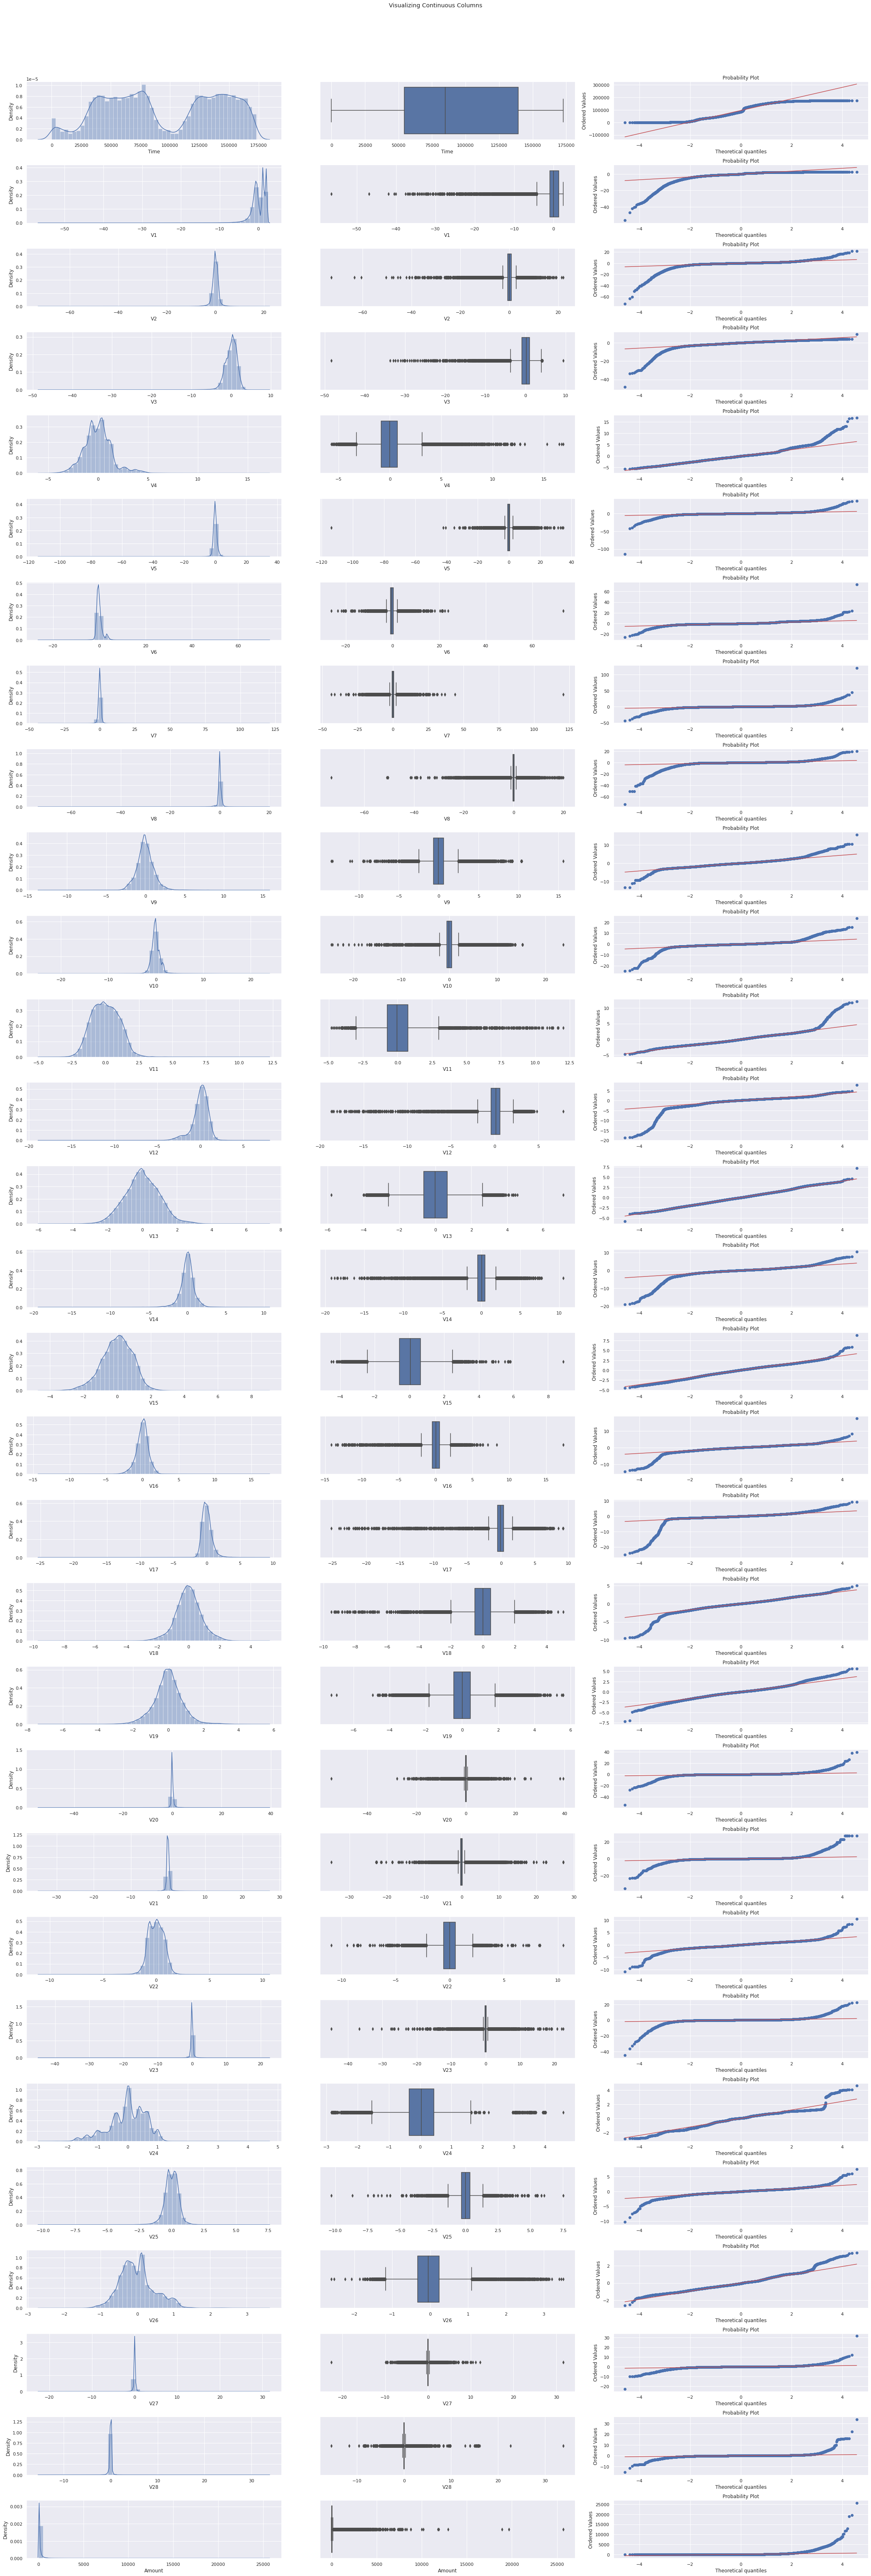

In [34]:
exploratory_data(df)

# Missing Value Analysis

In [35]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Outlier Analysis

In [36]:
def outlier_thresholds(dataframe,col_name,q1=0.10,q3=0.90):
  quartile1 = dataframe[col_name].quantile(q1)
  quartile3 = dataframe[col_name].quantile(q3)
  interquartile_range = quartile3 - quartile1
  low_limit = quartile1 - 1.5 * interquartile_range
  up_limit = quartile3 + 1.5 * interquartile_range
  return low_limit,up_limit

In [37]:
def check_outlier(dataframe, col_name):
  low_limit,up_limit = outlier_thresholds(dataframe,col_name)
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
    return True
  else:
    return False

In [38]:
def replace_with_thresholds(dataframe, col_name):
  low_limit, up_limit = outlier_thresholds(dataframe, col_name)
  dataframe.loc[(dataframe[col_name] < low_limit), col_name] = low_limit
  dataframe.loc[(dataframe[col_name] > up_limit), col_name] = up_limit

In [39]:
def solve_outliers(dataframe, target):
  cat_cols, num_cols, cat_but_car = grab_col_names(dataframe)
  for col in num_cols:
    if col!=target:
      print(col, check_outlier(dataframe, col))
      if check_outlier(dataframe, col):
        replace_with_thresholds(dataframe, col)

In [40]:
solve_outliers(df, "Class")

Time False
V1 True
V2 True
V3 True
V4 True
V5 True
V6 True
V7 True
V8 True
V9 True
V10 True
V11 True
V12 True
V13 True
V14 True
V15 True
V16 True
V17 True
V18 True
V19 True
V20 True
V21 True
V22 True
V23 True
V24 True
V25 True
V26 True
V27 True
V28 True
Amount True


In [41]:
def check_outlier_df(dataframe, target):
  cat_cols, num_cols, cat_but_car = grab_col_names(dataframe)
  for col in num_cols:
    if col!=target:
      print(col, check_outlier(dataframe, col))

In [42]:
check_outlier_df(df, "Class")

Time False
V1 False
V2 False
V3 False
V4 False
V5 False
V6 False
V7 False
V8 False
V9 False
V10 False
V11 False
V12 False
V13 False
V14 False
V15 False
V16 False
V17 False
V18 False
V19 False
V20 False
V21 False
V22 False
V23 False
V24 False
V25 False
V26 False
V27 False
V28 False
Amount False


# Encoding Scaling

In [44]:
rob_scaler = RobustScaler()
df['Amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['Time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.9950,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,0.0908,-0.5516,-0.6178,-0.9914,-0.3112,1.4682,-0.4704,0.2080,0.0258,0.4040,0.2514,-0.0183,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,1.7833,0
1,-0.9950,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,-0.1670,1.6127,1.0652,0.4891,-0.1438,0.6356,0.4639,-0.1148,-0.1834,-0.1458,-0.0691,-0.2258,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,-0.2698,0
2,-0.9950,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,-1.5147,0.2076,0.6245,0.0661,0.7173,-0.1659,2.3459,-2.8901,1.1100,-0.1214,-2.2619,0.5250,0.2480,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598,4.9837,0
3,-0.9950,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,-1.3870,-0.0550,-0.2265,0.1782,0.5078,-0.2879,-0.6314,-1.0596,-0.6841,1.9658,-1.2326,-0.2080,-0.1083,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615,1.4183,0
4,-0.9950,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,0.8177,0.7531,-0.8228,0.5382,1.3459,-1.1197,0.1751,-0.4514,-0.2370,-0.0382,0.8035,0.4085,-0.0094,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152,0.6706,0


# Create a Base Model

In [54]:
def logistic_model(dataframe, target, test_size=0.20, results=True):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
  model = LogisticRegression(random_state=123).fit(X_train, y_train)

  if results:

    # Acc Score
    acc = accuracy_score(y, model.predict(X))
    acc_train = accuracy_score(y_train, model.predict(X_train))
    acc_test = accuracy_score(y_test, model.predict(X_test))

    # R2 Score
    r2 = model.score(X, y)
    r2_train = model.score(X_train, y_train)
    r2_test = model.score(X_test, y_test)

    print("##################### Accuracy Score ######################")
    print("Acc: %.3f , Acc Train: %.3f  , Acc Test: %.3f \n" % (acc, acc_train, acc_test))
    print("##################### R2 Score ######################")
    print("R2: %.3f , R2 Train: %.3f , R2 Test: %.3f \n" % (r2, r2_train, r2_test))

  return model

In [55]:
logistic_model = logistic_model(df, "Class")

##################### Accuracy Score ######################
Acc: 0.999 , Acc Train: 0.999  , Acc Test: 1.000 

##################### R2 Score ######################
R2: 0.999 , R2 Train: 0.999 , R2 Test: 1.000 



**Note:** The accuracy score of the model we created is 0.999. Does our model work perfectly? The answer is of course no :(

Let's look at the results of other metrics for why I said no and see if I'm right :)

# Choosing the Suitable Metrics

In [58]:
def logistic_model(dataframe, target, test_size=0.20, cv=10, results=True, conf_matrix=True, c_report=True, roc_plot=True, plot_cm=True):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
  model = LogisticRegression(random_state=123).fit(X_train, y_train)

  if results:

    # Acc Score
    acc = accuracy_score(y, model.predict(X))
    acc_train = accuracy_score(y_train, model.predict(X_train))
    acc_test = accuracy_score(y_test, model.predict(X_test))

    # R2 Score
    r2 = model.score(X, y)
    r2_train = model.score(X_train, y_train)
    r2_test = model.score(X_test, y_test)

    # Cross Validate Score
    cv_results = cross_validate(model, X, y, cv=cv, scoring=["accuracy", "f1", "roc_auc"])
    cv_results_train = cross_validate(model, X_train, y_train, cv=cv, scoring=["accuracy", "f1", "roc_auc"])
    cv_results_test = cross_validate(model, X_test, y_test, cv=cv, scoring=["accuracy", "f1", "roc_auc"])

    print("##################### Accuracy Score ######################")
    print("Acc: %.3f , Acc Train: %.3f  , Acc Test: %.3f \n" % (acc, acc_train, acc_test))
    print("##################### R2 Score ######################")
    print("R2: %.3f , R2 Train: %.3f , R2 Test: %.3f \n" % (r2, r2_train, r2_test))
    print("##################### Cross Validate Score ######################")
    print("CV(X,y) ===> Acc: %.3f , f1: %.3f , roc_auc: %.3f" % (cv_results["test_accuracy"].mean(), cv_results["test_f1"].mean(), cv_results["test_roc_auc"].mean()))
    print("CV(X_train,y_train) ===> Acc: %.3f , f1: %.3f , roc_auc: %.3f" % (cv_results_train["test_accuracy"].mean(), cv_results_train["test_f1"].mean(), cv_results_train["test_roc_auc"].mean()))
    print("CV(X_test,y_test) ===> Acc: %.3f , f1: %.3f , roc_auc: %.3f \n" % (cv_results_test["test_accuracy"].mean(), cv_results_test["test_f1"].mean(), cv_results_test["test_roc_auc"].mean()))

  if conf_matrix:
    print("##################### Confusion Matrix(X, y) ######################")
    print(confusion_matrix(y, model.predict(X)))
    print("##################### Confusion Matrix(Train) ######################")
    print(confusion_matrix(y_train, model.predict(X_train)))
    print("##################### Confusion Matrix(Test) ######################")
    print(confusion_matrix(y_test, model.predict(X_test)))
  
  if c_report:
    print("###################### Classification Report(X, y) ######################")
    print(classification_report(y, model.predict(X)))
    print("###################### Classification Report(Train) ######################")
    print(classification_report(y_train, model.predict(X_train)))
    print("###################### Classification Report(Test) ######################")
    print(classification_report(y_test, model.predict(X_test)))
  
  if roc_plot:
    print("###################### Roc Auc Score ######################")
    roc_auc_test = roc_auc_score(y_test, model.predict(X_test))
    print("Roc Auc Test: ", "%.3f" % roc_auc_test)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='AUC (area = %.3f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Ratio')
    plt.ylabel('True Positive Ratio')
    plt.title('ROC')
    plt.show()
    plt.savefig("roc_auc.png")

  if plot_cm:
    fig, ax = plt.subplots(figsize=(5, 5))
    plot_confusion_matrix(model, X_test, y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
    plt.title("Confusion Matrix")
    plt.grid(False)
    plt.show()
    plt.savefig("confusion_matrix.png")

  return model

##################### Accuracy Score ######################
Acc: 0.999 , Acc Train: 0.999  , Acc Test: 0.999 

##################### R2 Score ######################
R2: 0.999 , R2 Train: 0.999 , R2 Test: 0.999 

##################### Cross Validate Score ######################
CV(X,y) ===> Acc: 0.999 , f1: 0.791 , roc_auc: 0.979
CV(X_train,y_train) ===> Acc: 0.999 , f1: 0.818 , roc_auc: 0.980
CV(X_test,y_test) ===> Acc: 0.999 , f1: 0.810 , roc_auc: 0.960 

##################### Confusion Matrix(X, y) ######################
[[284266     49]
 [   109    383]]
##################### Confusion Matrix(Train) ######################
[[227423     40]
 [    85    297]]
##################### Confusion Matrix(Test) ######################
[[56843     9]
 [   24    86]]
###################### Classification Report(X, y) ######################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.89      0.78      0.83       

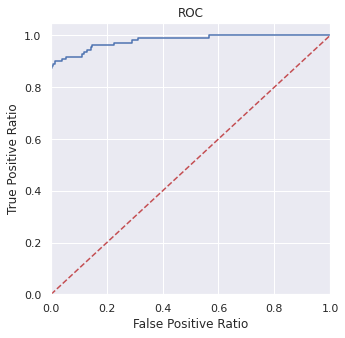

<Figure size 1296x936 with 0 Axes>

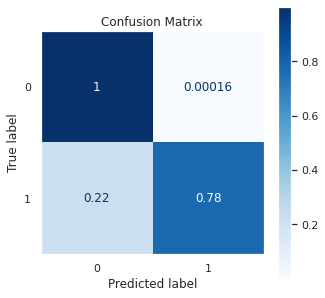

<Figure size 1296x936 with 0 Axes>

In [59]:
logistic_model = logistic_model(df, "Class")

**Note:** With this observation we have made, we can say that the accuarcy score is not a good performance measure for classification models, especially for unsupervised data sets, this statement is even more evident.

# Resampling

📌 Resampling is the stabilization of the data set by adding new samples to the minority class or removing samples from the majority class.

📌 Resampling can be implemented in two ways: 1) Oversampling 2) Undersampling

<img src="https://miro.medium.com/max/2956/1*YfQc_bSmbrlgD9gVd6f99A.png?width=1920&dpr=2" />

# Oversampling

📌 Stabilizes dataset by duplicating minority class samples

# Random Oversampling

* It is the organization of the data set by adding randomly selected samples from the minority class.
* This technique can be used if your dataset is small.
* It may cause overfitting.

**NOTE:** The methods should be applied to the training set. Correct evaluation cannot be made if it is applied to the test set.

In [61]:
def logistic_model(dataframe, target, test_size=0.20, cv=10, results=True, conf_matrix=True, c_report=True, roc_plot=True, plot_cm=True):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
  oversample = RandomOverSampler(sampling_strategy='minority')
  X_randomover, y_randomover = oversample.fit_resample(X_train, y_train)
  model = LogisticRegression(random_state=123).fit(X_randomover, y_randomover)

  if results:

    # Acc Score
    acc = accuracy_score(y, model.predict(X))
    acc_train = accuracy_score(y_train, model.predict(X_train))
    acc_test = accuracy_score(y_test, model.predict(X_test))

    # R2 Score
    r2 = model.score(X, y)
    r2_train = model.score(X_train, y_train)
    r2_test = model.score(X_test, y_test)

    # Cross Validate Score
    cv_results = cross_validate(model, X, y, cv=cv, scoring=["accuracy", "f1", "roc_auc"])
    cv_results_train = cross_validate(model, X_train, y_train, cv=cv, scoring=["accuracy", "f1", "roc_auc"])
    cv_results_test = cross_validate(model, X_test, y_test, cv=cv, scoring=["accuracy", "f1", "roc_auc"])

    print("##################### Before Random Oversampling ######################")
    print(y_train.value_counts())
    print("##################### After Random Oversampling ######################")
    print(y_randomover.value_counts())

    print("##################### Accuracy Score ######################")
    print("Acc: %.3f , Acc Train: %.3f  , Acc Test: %.3f \n" % (acc, acc_train, acc_test))
    print("##################### R2 Score ######################")
    print("R2: %.3f , R2 Train: %.3f , R2 Test: %.3f \n" % (r2, r2_train, r2_test))
    print("##################### Cross Validate Score ######################")
    print("CV(X,y) ===> Acc: %.3f , f1: %.3f , roc_auc: %.3f" % (cv_results["test_accuracy"].mean(), cv_results["test_f1"].mean(), cv_results["test_roc_auc"].mean()))
    print("CV(X_train,y_train) ===> Acc: %.3f , f1: %.3f , roc_auc: %.3f" % (cv_results_train["test_accuracy"].mean(), cv_results_train["test_f1"].mean(), cv_results_train["test_roc_auc"].mean()))
    print("CV(X_test,y_test) ===> Acc: %.3f , f1: %.3f , roc_auc: %.3f \n" % (cv_results_test["test_accuracy"].mean(), cv_results_test["test_f1"].mean(), cv_results_test["test_roc_auc"].mean()))

  if conf_matrix:
    print("##################### Confusion Matrix(X, y) ######################")
    print(confusion_matrix(y, model.predict(X)))
    print("##################### Confusion Matrix(Train) ######################")
    print(confusion_matrix(y_train, model.predict(X_train)))
    print("##################### Confusion Matrix(Test) ######################")
    print(confusion_matrix(y_test, model.predict(X_test)))
  
  if c_report:
    print("###################### Classification Report(X, y) ######################")
    print(classification_report(y, model.predict(X)))
    print("###################### Classification Report(Train) ######################")
    print(classification_report(y_train, model.predict(X_train)))
    print("###################### Classification Report(Test) ######################")
    print(classification_report(y_test, model.predict(X_test)))
  
  if roc_plot:
    print("###################### Roc Auc Score ######################")
    roc_auc_test = roc_auc_score(y_test, model.predict(X_test))
    print("Roc Auc Test: ", "%.3f" % roc_auc_test)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='AUC (area = %.3f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Ratio')
    plt.ylabel('True Positive Ratio')
    plt.title('ROC')
    plt.show()
    plt.savefig("roc_auc.png")

  if plot_cm:
    fig, ax = plt.subplots(figsize=(5, 5))
    plot_confusion_matrix(model, X_test, y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
    plt.title("Confusion Matrix")
    plt.grid(False)
    plt.show()
    plt.savefig("confusion_matrix.png")

  return model

##################### Before Random Oversampling ######################
0    227455
1       390
Name: Class, dtype: int64
##################### After Random Oversampling ######################
0    227455
1    227455
Name: Class, dtype: int64
##################### Accuracy Score ######################
Acc: 0.975 , Acc Train: 0.975  , Acc Test: 0.975 

##################### R2 Score ######################
R2: 0.975 , R2 Train: 0.975 , R2 Test: 0.975 

##################### Cross Validate Score ######################
CV(X,y) ===> Acc: 0.999 , f1: 0.791 , roc_auc: 0.979
CV(X_train,y_train) ===> Acc: 0.999 , f1: 0.815 , roc_auc: 0.976
CV(X_test,y_test) ===> Acc: 0.999 , f1: 0.827 , roc_auc: 0.990 

##################### Confusion Matrix(X, y) ######################
[[277224   7091]
 [    35    457]]
##################### Confusion Matrix(Train) ######################
[[221763   5692]
 [    29    361]]
##################### Confusion Matrix(Test) ######################
[[55461  1399]
 [    

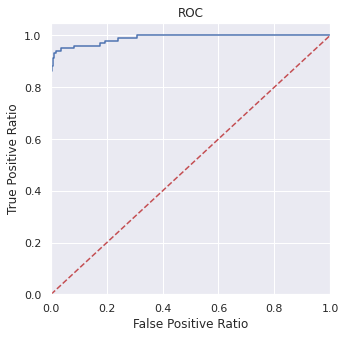

<Figure size 1296x936 with 0 Axes>

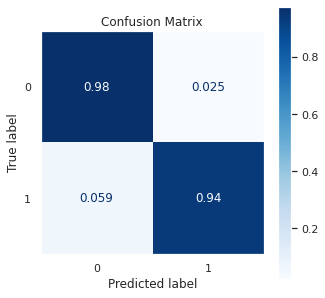

<Figure size 1296x936 with 0 Axes>

In [62]:
logistic_model = logistic_model(df, "Class")

# SMOTE Oversampling

📌 Generating minority class synthetic samples to prevent overfitting.

* First, a random sample from the minority class is selected.
* Then, k nearest neighbors are found for this sample.
* One of the k nearest neighbors is randomly selected and the synthetic sample is formed by combining it with the randomly selected sample from the minority class, forming a line segment in the feature space.

In [64]:
def logistic_model(dataframe, target, test_size=0.20, cv=10, results=True, conf_matrix=True, c_report=True, roc_plot=True, plot_cm=True):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
  oversample = SMOTE()
  X_smote, y_smote = oversample.fit_resample(X_train, y_train)
  model = LogisticRegression(random_state=123).fit(X_smote, y_smote)

  if results:

    # Acc Score
    acc = accuracy_score(y, model.predict(X))
    acc_train = accuracy_score(y_train, model.predict(X_train))
    acc_test = accuracy_score(y_test, model.predict(X_test))

    # R2 Score
    r2 = model.score(X, y)
    r2_train = model.score(X_train, y_train)
    r2_test = model.score(X_test, y_test)

    # Cross Validate Score
    cv_results = cross_validate(model, X, y, cv=cv, scoring=["accuracy", "f1", "roc_auc"])
    cv_results_train = cross_validate(model, X_train, y_train, cv=cv, scoring=["accuracy", "f1", "roc_auc"])
    cv_results_test = cross_validate(model, X_test, y_test, cv=cv, scoring=["accuracy", "f1", "roc_auc"])

    print("##################### Before SMOTE Oversampling ######################")
    print(y_train.value_counts())
    print("##################### After SMOTE Oversampling ######################")
    print(y_smote.value_counts())

    print("##################### Accuracy Score ######################")
    print("Acc: %.3f , Acc Train: %.3f  , Acc Test: %.3f \n" % (acc, acc_train, acc_test))
    print("##################### R2 Score ######################")
    print("R2: %.3f , R2 Train: %.3f , R2 Test: %.3f \n" % (r2, r2_train, r2_test))
    print("##################### Cross Validate Score ######################")
    print("CV(X,y) ===> Acc: %.3f , f1: %.3f , roc_auc: %.3f" % (cv_results["test_accuracy"].mean(), cv_results["test_f1"].mean(), cv_results["test_roc_auc"].mean()))
    print("CV(X_train,y_train) ===> Acc: %.3f , f1: %.3f , roc_auc: %.3f" % (cv_results_train["test_accuracy"].mean(), cv_results_train["test_f1"].mean(), cv_results_train["test_roc_auc"].mean()))
    print("CV(X_test,y_test) ===> Acc: %.3f , f1: %.3f , roc_auc: %.3f \n" % (cv_results_test["test_accuracy"].mean(), cv_results_test["test_f1"].mean(), cv_results_test["test_roc_auc"].mean()))

  if conf_matrix:
    print("##################### Confusion Matrix(X, y) ######################")
    print(confusion_matrix(y, model.predict(X)))
    print("##################### Confusion Matrix(Train) ######################")
    print(confusion_matrix(y_train, model.predict(X_train)))
    print("##################### Confusion Matrix(Test) ######################")
    print(confusion_matrix(y_test, model.predict(X_test)))
  
  if c_report:
    print("###################### Classification Report(X, y) ######################")
    print(classification_report(y, model.predict(X)))
    print("###################### Classification Report(Train) ######################")
    print(classification_report(y_train, model.predict(X_train)))
    print("###################### Classification Report(Test) ######################")
    print(classification_report(y_test, model.predict(X_test)))
  
  if roc_plot:
    print("###################### Roc Auc Score ######################")
    roc_auc_test = roc_auc_score(y_test, model.predict(X_test))
    print("Roc Auc Test: ", "%.3f" % roc_auc_test)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='AUC (area = %.3f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Ratio')
    plt.ylabel('True Positive Ratio')
    plt.title('ROC')
    plt.show()
    plt.savefig("roc_auc.png")

  if plot_cm:
    fig, ax = plt.subplots(figsize=(5, 5))
    plot_confusion_matrix(model, X_test, y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
    plt.title("Confusion Matrix")
    plt.grid(False)
    plt.show()
    plt.savefig("confusion_matrix.png")

  return model

##################### Before SMOTE Oversampling ######################
0    227453
1       392
Name: Class, dtype: int64
##################### After SMOTE Oversampling ######################
0    227453
1    227453
Name: Class, dtype: int64
##################### Accuracy Score ######################
Acc: 0.974 , Acc Train: 0.974  , Acc Test: 0.973 

##################### R2 Score ######################
R2: 0.974 , R2 Train: 0.974 , R2 Test: 0.973 

##################### Cross Validate Score ######################
CV(X,y) ===> Acc: 0.999 , f1: 0.791 , roc_auc: 0.979
CV(X_train,y_train) ===> Acc: 0.999 , f1: 0.810 , roc_auc: 0.979
CV(X_test,y_test) ===> Acc: 0.999 , f1: 0.825 , roc_auc: 0.969 

##################### Confusion Matrix(X, y) ######################
[[276892   7423]
 [    40    452]]
##################### Confusion Matrix(Train) ######################
[[221530   5923]
 [    29    363]]
##################### Confusion Matrix(Test) ######################
[[55362  1500]
 [   11 

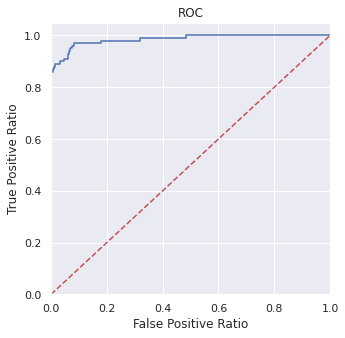

<Figure size 1296x936 with 0 Axes>

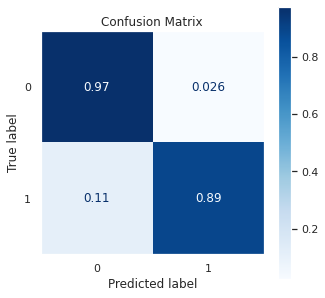

<Figure size 1296x936 with 0 Axes>

In [65]:
logistic_model = logistic_model(df, "Class")

# Undersampling

📌 It is a technique of balancing the data set by removing samples belonging to the majority class. It can be used when you have a large data set. Since the data set we have is not large, efficient results will not be obtained.

# Random Undersampling

* Extracted samples are randomly selected.
* You can use this technique if you have a large data set.
* Information may be lost due to random selection.

In [67]:
def logistic_model(dataframe, target, test_size=0.20, cv=10, results=True, conf_matrix=True, c_report=True, roc_plot=True, plot_cm=True):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
  ranUnSample = RandomUnderSampler()
  X_ranUnSample, y_ranUnSample = ranUnSample.fit_resample(X_train, y_train)
  model = LogisticRegression(random_state=123).fit(X_ranUnSample, y_ranUnSample)

  if results:

    # Acc Score
    acc = accuracy_score(y, model.predict(X))
    acc_train = accuracy_score(y_train, model.predict(X_train))
    acc_test = accuracy_score(y_test, model.predict(X_test))

    # R2 Score
    r2 = model.score(X, y)
    r2_train = model.score(X_train, y_train)
    r2_test = model.score(X_test, y_test)

    # Cross Validate Score
    cv_results = cross_validate(model, X, y, cv=cv, scoring=["accuracy", "f1", "roc_auc"])
    cv_results_train = cross_validate(model, X_train, y_train, cv=cv, scoring=["accuracy", "f1", "roc_auc"])
    cv_results_test = cross_validate(model, X_test, y_test, cv=cv, scoring=["accuracy", "f1", "roc_auc"])

    print("##################### Before Random Undersampling ######################")
    print(y_train.value_counts())
    print("##################### After Random Undersampling ######################")
    print(y_ranUnSample.value_counts())

    print("##################### Accuracy Score ######################")
    print("Acc: %.3f , Acc Train: %.3f  , Acc Test: %.3f \n" % (acc, acc_train, acc_test))
    print("##################### R2 Score ######################")
    print("R2: %.3f , R2 Train: %.3f , R2 Test: %.3f \n" % (r2, r2_train, r2_test))
    print("##################### Cross Validate Score ######################")
    print("CV(X,y) ===> Acc: %.3f , f1: %.3f , roc_auc: %.3f" % (cv_results["test_accuracy"].mean(), cv_results["test_f1"].mean(), cv_results["test_roc_auc"].mean()))
    print("CV(X_train,y_train) ===> Acc: %.3f , f1: %.3f , roc_auc: %.3f" % (cv_results_train["test_accuracy"].mean(), cv_results_train["test_f1"].mean(), cv_results_train["test_roc_auc"].mean()))
    print("CV(X_test,y_test) ===> Acc: %.3f , f1: %.3f , roc_auc: %.3f \n" % (cv_results_test["test_accuracy"].mean(), cv_results_test["test_f1"].mean(), cv_results_test["test_roc_auc"].mean()))

  if conf_matrix:
    print("##################### Confusion Matrix(X, y) ######################")
    print(confusion_matrix(y, model.predict(X)))
    print("##################### Confusion Matrix(Train) ######################")
    print(confusion_matrix(y_train, model.predict(X_train)))
    print("##################### Confusion Matrix(Test) ######################")
    print(confusion_matrix(y_test, model.predict(X_test)))
  
  if c_report:
    print("###################### Classification Report(X, y) ######################")
    print(classification_report(y, model.predict(X)))
    print("###################### Classification Report(Train) ######################")
    print(classification_report(y_train, model.predict(X_train)))
    print("###################### Classification Report(Test) ######################")
    print(classification_report(y_test, model.predict(X_test)))
  
  if roc_plot:
    print("###################### Roc Auc Score ######################")
    roc_auc_test = roc_auc_score(y_test, model.predict(X_test))
    print("Roc Auc Test: ", "%.3f" % roc_auc_test)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='AUC (area = %.3f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Ratio')
    plt.ylabel('True Positive Ratio')
    plt.title('ROC')
    plt.show()
    plt.savefig("roc_auc.png")

  if plot_cm:
    fig, ax = plt.subplots(figsize=(5, 5))
    plot_confusion_matrix(model, X_test, y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
    plt.title("Confusion Matrix")
    plt.grid(False)
    plt.show()
    plt.savefig("confusion_matrix.png")

  return model

##################### Before Random Undersampling ######################
0    227452
1       393
Name: Class, dtype: int64
##################### After Random Undersampling ######################
0    393
1    393
Name: Class, dtype: int64
##################### Accuracy Score ######################
Acc: 0.974 , Acc Train: 0.974  , Acc Test: 0.973 

##################### R2 Score ######################
R2: 0.974 , R2 Train: 0.974 , R2 Test: 0.973 

##################### Cross Validate Score ######################
CV(X,y) ===> Acc: 0.999 , f1: 0.791 , roc_auc: 0.979
CV(X_train,y_train) ===> Acc: 0.999 , f1: 0.829 , roc_auc: 0.980
CV(X_test,y_test) ===> Acc: 0.999 , f1: 0.791 , roc_auc: 0.981 

##################### Confusion Matrix(X, y) ######################
[[276813   7502]
 [    39    453]]
##################### Confusion Matrix(Train) ######################
[[221480   5972]
 [    30    363]]
##################### Confusion Matrix(Test) ######################
[[55333  1530]
 [    9   

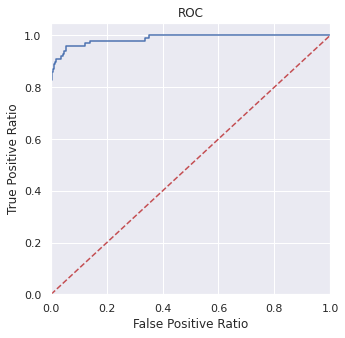

<Figure size 1296x936 with 0 Axes>

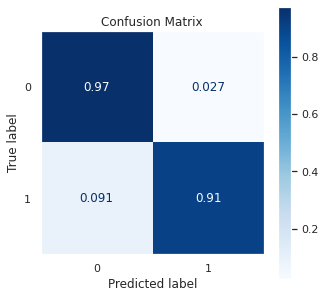

<Figure size 1296x936 with 0 Axes>

In [68]:
logistic_model = logistic_model(df, "Class")

# NearMiss Undersampling

* It prevents information loss.
* It is based on the KNN algorithm.
* The distance of the samples belonging to the majority class with the samples belonging to the minority class is calculated.
* Samples with shorter distances relative to the specified k value are preserved.

In [72]:
def logistic_model(dataframe, target, test_size=0.20, cv=10, results=True, conf_matrix=True, c_report=True, roc_plot=True, plot_cm=True):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
  nearUnSample = NearMiss(version=3)
  X_nearUnSample, y_nearUnSample = nearUnSample.fit_resample(X_train, y_train)
  model = LogisticRegression(random_state=123).fit(X_nearUnSample, y_nearUnSample)

  if results:

    # Acc Score
    acc = accuracy_score(y, model.predict(X))
    acc_train = accuracy_score(y_train, model.predict(X_train))
    acc_test = accuracy_score(y_test, model.predict(X_test))

    # R2 Score
    r2 = model.score(X, y)
    r2_train = model.score(X_train, y_train)
    r2_test = model.score(X_test, y_test)

    # Cross Validate Score
    cv_results = cross_validate(model, X, y, cv=cv, scoring=["accuracy", "f1", "roc_auc"])
    cv_results_train = cross_validate(model, X_train, y_train, cv=cv, scoring=["accuracy", "f1", "roc_auc"])
    cv_results_test = cross_validate(model, X_test, y_test, cv=cv, scoring=["accuracy", "f1", "roc_auc"])

    print("##################### Before NearMiss Undersampling ######################")
    print(y_train.value_counts())
    print("##################### After NearMiss Undersampling ######################")
    print(y_nearUnSample.value_counts())

    print("##################### Accuracy Score ######################")
    print("Acc: %.3f , Acc Train: %.3f  , Acc Test: %.3f \n" % (acc, acc_train, acc_test))
    print("##################### R2 Score ######################")
    print("R2: %.3f , R2 Train: %.3f , R2 Test: %.3f \n" % (r2, r2_train, r2_test))
    print("##################### Cross Validate Score ######################")
    print("CV(X,y) ===> Acc: %.3f , f1: %.3f , roc_auc: %.3f" % (cv_results["test_accuracy"].mean(), cv_results["test_f1"].mean(), cv_results["test_roc_auc"].mean()))
    print("CV(X_train,y_train) ===> Acc: %.3f , f1: %.3f , roc_auc: %.3f" % (cv_results_train["test_accuracy"].mean(), cv_results_train["test_f1"].mean(), cv_results_train["test_roc_auc"].mean()))
    print("CV(X_test,y_test) ===> Acc: %.3f , f1: %.3f , roc_auc: %.3f \n" % (cv_results_test["test_accuracy"].mean(), cv_results_test["test_f1"].mean(), cv_results_test["test_roc_auc"].mean()))

  if conf_matrix:
    print("##################### Confusion Matrix(X, y) ######################")
    print(confusion_matrix(y, model.predict(X)))
    print("##################### Confusion Matrix(Train) ######################")
    print(confusion_matrix(y_train, model.predict(X_train)))
    print("##################### Confusion Matrix(Test) ######################")
    print(confusion_matrix(y_test, model.predict(X_test)))
  
  if c_report:
    print("###################### Classification Report(X, y) ######################")
    print(classification_report(y, model.predict(X)))
    print("###################### Classification Report(Train) ######################")
    print(classification_report(y_train, model.predict(X_train)))
    print("###################### Classification Report(Test) ######################")
    print(classification_report(y_test, model.predict(X_test)))
  
  if roc_plot:
    print("###################### Roc Auc Score ######################")
    roc_auc_test = roc_auc_score(y_test, model.predict(X_test))
    print("Roc Auc Test: ", "%.3f" % roc_auc_test)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='AUC (area = %.3f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Ratio')
    plt.ylabel('True Positive Ratio')
    plt.title('ROC')
    plt.show()
    plt.savefig("roc_auc.png")

  if plot_cm:
    fig, ax = plt.subplots(figsize=(5, 5))
    plot_confusion_matrix(model, X_test, y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
    plt.title("Confusion Matrix")
    plt.grid(False)
    plt.show()
    plt.savefig("confusion_matrix.png")

  return model

##################### Before NearMiss Undersampling ######################
0    227446
1       399
Name: Class, dtype: int64
##################### After NearMiss Undersampling ######################
1    399
0    324
Name: Class, dtype: int64
##################### Accuracy Score ######################
Acc: 0.990 , Acc Train: 0.990  , Acc Test: 0.989 

##################### R2 Score ######################
R2: 0.990 , R2 Train: 0.990 , R2 Test: 0.989 

##################### Cross Validate Score ######################
CV(X,y) ===> Acc: 0.999 , f1: 0.791 , roc_auc: 0.979
CV(X_train,y_train) ===> Acc: 0.999 , f1: 0.816 , roc_auc: 0.979
CV(X_test,y_test) ===> Acc: 1.000 , f1: 0.837 , roc_auc: 0.981 

##################### Confusion Matrix(X, y) ######################
[[281483   2832]
 [    96    396]]
##################### Confusion Matrix(Train) ######################
[[225206   2240]
 [    81    318]]
##################### Confusion Matrix(Test) ######################
[[56277   592]
 [   1

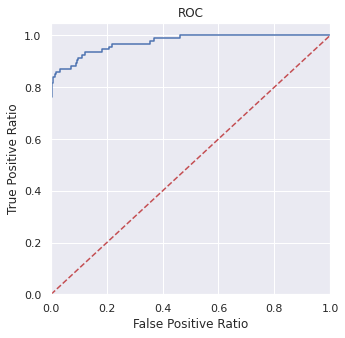

<Figure size 1296x936 with 0 Axes>

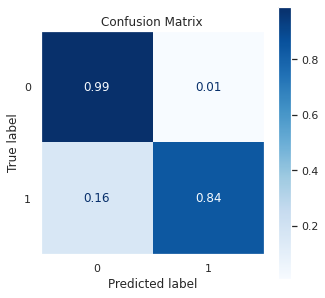

<Figure size 1296x936 with 0 Axes>

In [73]:
logistic_model = logistic_model(df, "Class")

# Undersampling (Tomek links)

📌 By removing instances of the majority class between the two nearest instances belonging to different classes, the gap between the two classes is increased.

In [75]:
def logistic_model(dataframe, target, test_size=0.20, cv=10, results=True, conf_matrix=True, c_report=True, roc_plot=True, plot_cm=True):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
  tomekUnSample = TomekLinks()
  X_tomekUnSample, y_tomekUnSample = tomekUnSample.fit_resample(X_train, y_train)
  model = LogisticRegression(random_state=123).fit(X_tomekUnSample, y_tomekUnSample)

  if results:

    # Acc Score
    acc = accuracy_score(y, model.predict(X))
    acc_train = accuracy_score(y_train, model.predict(X_train))
    acc_test = accuracy_score(y_test, model.predict(X_test))

    # R2 Score
    r2 = model.score(X, y)
    r2_train = model.score(X_train, y_train)
    r2_test = model.score(X_test, y_test)

    # Cross Validate Score
    cv_results = cross_validate(model, X, y, cv=cv, scoring=["accuracy", "f1", "roc_auc"])
    cv_results_train = cross_validate(model, X_train, y_train, cv=cv, scoring=["accuracy", "f1", "roc_auc"])
    cv_results_test = cross_validate(model, X_test, y_test, cv=cv, scoring=["accuracy", "f1", "roc_auc"])

    print("##################### Before Tomek Links Undersampling ######################")
    print(y_train.value_counts())
    print("##################### After Tomek Links Undersampling ######################")
    print(y_tomekUnSample.value_counts())

    print("##################### Accuracy Score ######################")
    print("Acc: %.3f , Acc Train: %.3f  , Acc Test: %.3f \n" % (acc, acc_train, acc_test))
    print("##################### R2 Score ######################")
    print("R2: %.3f , R2 Train: %.3f , R2 Test: %.3f \n" % (r2, r2_train, r2_test))
    print("##################### Cross Validate Score ######################")
    print("CV(X,y) ===> Acc: %.3f , f1: %.3f , roc_auc: %.3f" % (cv_results["test_accuracy"].mean(), cv_results["test_f1"].mean(), cv_results["test_roc_auc"].mean()))
    print("CV(X_train,y_train) ===> Acc: %.3f , f1: %.3f , roc_auc: %.3f" % (cv_results_train["test_accuracy"].mean(), cv_results_train["test_f1"].mean(), cv_results_train["test_roc_auc"].mean()))
    print("CV(X_test,y_test) ===> Acc: %.3f , f1: %.3f , roc_auc: %.3f \n" % (cv_results_test["test_accuracy"].mean(), cv_results_test["test_f1"].mean(), cv_results_test["test_roc_auc"].mean()))

  if conf_matrix:
    print("##################### Confusion Matrix(X, y) ######################")
    print(confusion_matrix(y, model.predict(X)))
    print("##################### Confusion Matrix(Train) ######################")
    print(confusion_matrix(y_train, model.predict(X_train)))
    print("##################### Confusion Matrix(Test) ######################")
    print(confusion_matrix(y_test, model.predict(X_test)))
  
  if c_report:
    print("###################### Classification Report(X, y) ######################")
    print(classification_report(y, model.predict(X)))
    print("###################### Classification Report(Train) ######################")
    print(classification_report(y_train, model.predict(X_train)))
    print("###################### Classification Report(Test) ######################")
    print(classification_report(y_test, model.predict(X_test)))
  
  if roc_plot:
    print("###################### Roc Auc Score ######################")
    roc_auc_test = roc_auc_score(y_test, model.predict(X_test))
    print("Roc Auc Test: ", "%.3f" % roc_auc_test)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='AUC (area = %.3f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Ratio')
    plt.ylabel('True Positive Ratio')
    plt.title('ROC')
    plt.show()
    plt.savefig("roc_auc.png")

  if plot_cm:
    fig, ax = plt.subplots(figsize=(5, 5))
    plot_confusion_matrix(model, X_test, y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
    plt.title("Confusion Matrix")
    plt.grid(False)
    plt.show()
    plt.savefig("confusion_matrix.png")

  return model

##################### Before Tomek Links Undersampling ######################
0    227461
1       384
Name: Class, dtype: int64
##################### After Tomek Links Undersampling ######################
0    227444
1       384
Name: Class, dtype: int64
##################### Accuracy Score ######################
Acc: 0.999 , Acc Train: 0.999  , Acc Test: 0.999 

##################### R2 Score ######################
R2: 0.999 , R2 Train: 0.999 , R2 Test: 0.999 

##################### Cross Validate Score ######################
CV(X,y) ===> Acc: 0.999 , f1: 0.791 , roc_auc: 0.979
CV(X_train,y_train) ===> Acc: 0.999 , f1: 0.813 , roc_auc: 0.979
CV(X_test,y_test) ===> Acc: 0.999 , f1: 0.842 , roc_auc: 0.964 

##################### Confusion Matrix(X, y) ######################
[[284272     43]
 [   116    376]]
##################### Confusion Matrix(Train) ######################
[[227425     36]
 [    93    291]]
##################### Confusion Matrix(Test) ######################
[[56847  

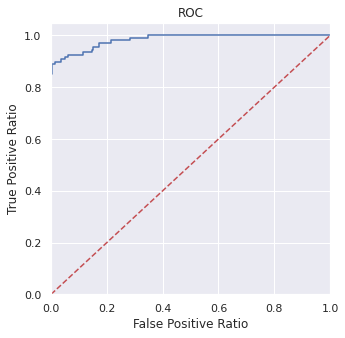

<Figure size 1296x936 with 0 Axes>

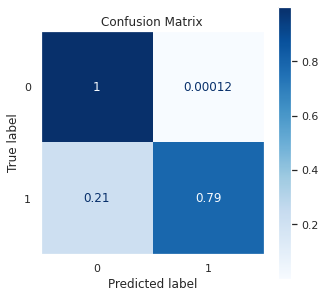

<Figure size 1296x936 with 0 Axes>

In [76]:
logistic_model = logistic_model(df, "Class")

# Undersampling (Cluster Centroids)

📌 It is the removal of unimportant samples from the data set. Whether the sample is important or unimportant is determined by clustering.

In [78]:
def logistic_model(dataframe, target, test_size=0.20, cv=10, results=True, conf_matrix=True, c_report=True, roc_plot=True, plot_cm=True):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
  clusterUnSample = ClusterCentroids()
  X_clusterUnSample, y_clusterUnSample = clusterUnSample.fit_resample(X_train, y_train)
  model = LogisticRegression(random_state=123).fit(X_clusterUnSample, y_clusterUnSample)

  if results:

    # Acc Score
    acc = accuracy_score(y, model.predict(X))
    acc_train = accuracy_score(y_train, model.predict(X_train))
    acc_test = accuracy_score(y_test, model.predict(X_test))

    # R2 Score
    r2 = model.score(X, y)
    r2_train = model.score(X_train, y_train)
    r2_test = model.score(X_test, y_test)

    # Cross Validate Score
    cv_results = cross_validate(model, X, y, cv=cv, scoring=["accuracy", "f1", "roc_auc"])
    cv_results_train = cross_validate(model, X_train, y_train, cv=cv, scoring=["accuracy", "f1", "roc_auc"])
    cv_results_test = cross_validate(model, X_test, y_test, cv=cv, scoring=["accuracy", "f1", "roc_auc"])

    print("##################### Before Cluster Centroids Undersampling ######################")
    print(y_train.value_counts())
    print("##################### After Cluster Centroids Undersampling ######################")
    print(y_clusterUnSample.value_counts())

    print("##################### Accuracy Score ######################")
    print("Acc: %.3f , Acc Train: %.3f  , Acc Test: %.3f \n" % (acc, acc_train, acc_test))
    print("##################### R2 Score ######################")
    print("R2: %.3f , R2 Train: %.3f , R2 Test: %.3f \n" % (r2, r2_train, r2_test))
    print("##################### Cross Validate Score ######################")
    print("CV(X,y) ===> Acc: %.3f , f1: %.3f , roc_auc: %.3f" % (cv_results["test_accuracy"].mean(), cv_results["test_f1"].mean(), cv_results["test_roc_auc"].mean()))
    print("CV(X_train,y_train) ===> Acc: %.3f , f1: %.3f , roc_auc: %.3f" % (cv_results_train["test_accuracy"].mean(), cv_results_train["test_f1"].mean(), cv_results_train["test_roc_auc"].mean()))
    print("CV(X_test,y_test) ===> Acc: %.3f , f1: %.3f , roc_auc: %.3f \n" % (cv_results_test["test_accuracy"].mean(), cv_results_test["test_f1"].mean(), cv_results_test["test_roc_auc"].mean()))

  if conf_matrix:
    print("##################### Confusion Matrix(X, y) ######################")
    print(confusion_matrix(y, model.predict(X)))
    print("##################### Confusion Matrix(Train) ######################")
    print(confusion_matrix(y_train, model.predict(X_train)))
    print("##################### Confusion Matrix(Test) ######################")
    print(confusion_matrix(y_test, model.predict(X_test)))
  
  if c_report:
    print("###################### Classification Report(X, y) ######################")
    print(classification_report(y, model.predict(X)))
    print("###################### Classification Report(Train) ######################")
    print(classification_report(y_train, model.predict(X_train)))
    print("###################### Classification Report(Test) ######################")
    print(classification_report(y_test, model.predict(X_test)))
  
  if roc_plot:
    print("###################### Roc Auc Score ######################")
    roc_auc_test = roc_auc_score(y_test, model.predict(X_test))
    print("Roc Auc Test: ", "%.3f" % roc_auc_test)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='AUC (area = %.3f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Ratio')
    plt.ylabel('True Positive Ratio')
    plt.title('ROC')
    plt.show()
    plt.savefig("roc_auc.png")

  if plot_cm:
    fig, ax = plt.subplots(figsize=(5, 5))
    plot_confusion_matrix(model, X_test, y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
    plt.title("Confusion Matrix")
    plt.grid(False)
    plt.show()
    plt.savefig("confusion_matrix.png")

  return model

##################### Before Cluster Centroids Undersampling ######################
0    227452
1       393
Name: Class, dtype: int64
##################### After Cluster Centroids Undersampling ######################
0    393
1    393
Name: Class, dtype: int64
##################### Accuracy Score ######################
Acc: 0.966 , Acc Train: 0.966  , Acc Test: 0.966 

##################### R2 Score ######################
R2: 0.966 , R2 Train: 0.966 , R2 Test: 0.966 

##################### Cross Validate Score ######################
CV(X,y) ===> Acc: 0.999 , f1: 0.791 , roc_auc: 0.979
CV(X_train,y_train) ===> Acc: 0.999 , f1: 0.821 , roc_auc: 0.978
CV(X_test,y_test) ===> Acc: 0.999 , f1: 0.770 , roc_auc: 0.990 

##################### Confusion Matrix(X, y) ######################
[[274750   9565]
 [    35    457]]
##################### Confusion Matrix(Train) ######################
[[219833   7619]
 [    30    363]]
##################### Confusion Matrix(Test) ######################
[[5

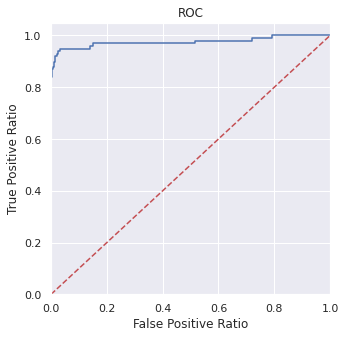

<Figure size 1296x936 with 0 Axes>

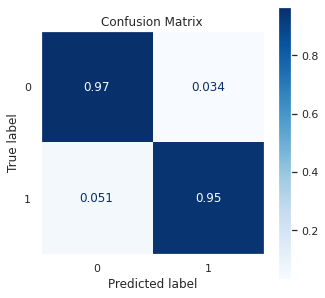

<Figure size 1296x936 with 0 Axes>

In [79]:
logistic_model = logistic_model(df, "Class")